# [Relatório Parcial] Projeto de SuperComputação (2023.1)

**Aluno:** Luca Coutinho Melão

## 1. Arquivos e seus conteúdos
----

Arquivos incluídos no projeto e seus conteúdos:

1. [**gulosa.cpp**](./gulosa.cpp): Implementação em C++ da heurística gulosa para o problema da maratona de filmes.

2. [**aleatoria.cpp**](./aleatoria.cpp): Implementação em C++ da heurística aleatoria para o problema da maratona de filmes.

4. [**inputs**](./inputs): Pasta contendo os 20 inputs gerados para teste das heurísticas. Os inputs possuem um número N de filmes de 100, 1000, 10000, 100000 e 1000000 filmes, e um número C de categorias que varia entre 4, 6, 8, 10. Os inputs são gerados aleatoriamente pelo código fornecido pelo professor, usando a biblioteca l

4. [**execute.py**](./execute.py): Script em Python que automatiza a geração dos resultados e executa cada heurística para cada input gerado.

5. [**RelatorioParcial.ipynb**](./RelatorioParcial.ipynb): Jupyter Notebook, contendo o relatório parcial do projeto.

6. [**gulosa_output.txt**](./gulosa_output.txt): Arquivo contendo os resultados da heurística gulosa para cada input gerado.

7. [**aleatoria_output.txt**](./aleatoria_output.txt): Arquivo contendo os resultados da heurística aleatória para cada input gerado.


## 2. Tratamento do input e lógica de geração do output
----

### 2.1. Tratamento do input

Os arquivos de input de ambos os programas posuem um formato padrão, que é o seguinte:

```txt
N C
c1 c2 c3 ... cC
id inicio fim categoria 
```

- A primeira linha indica o número de filmes N a serem considerados em um número C de categorias;
- A segunda linha indica qual o máximo de filmes que cada categoria pode ter;
- Da terceira linha em diante temos os n filmes, com suas respectivas hora de início, hora de término e categoria pertencente.

Assim, a captura desse input para implementação das heurísticas é feita de maneira similar para ambos os algoritmos:

```cpp
int N = 0; // n de filmes
int C = 0; // n de categorias

map<int, int> limites;
vector <filme> filmes, maratona; 

cin >> N >> C;

// Reserva um vetor de tamanho N para os filmes
filmes.reserve(N);

// Captura o número de filmes para cada categoria
for (int i = 0; i < C; i++){
    cin >> limites[i+1];
}

// Caso descomentado, chama a função que imprime os limites por categoria
// print_limits(limites, C);

for (int i = 0; i < N; i++){
    int inicio, fim, categoria;
    cin >> inicio >> fim >> categoria;
    filmes.push_back({i, inicio, fim, categoria});
}

// Corrige os filmes que viram noite
correct_time(filmes);
```

Primeiro o programa é o número de filmes N e o número de categorias C. Em seguida, é capturado o número de filmes que cada categoria pode ter, e armazenado em um dicionário. Em seguida, é capturado cada filme, com seu respectivo id, hora de início, hora de término e categoria. Por fim, é chamada a função `correct_time`, que corrige os filmes que viram noite, de modo que esses possam ser incorporados na maratona gerada pelo algoritmo.

### 2.2. Output

O output gerado pelo programa também é feito de maneira similar nos dois algoritmos. Sua lógica é dividida em duas etapas, sendo a primeira relacionada à exibição da agenda de filmes e de demais informações no terminal, e a segunda etapa relacionada a escrita do output em um arquivo de texto para futura análise por meio de um código em Python.


A primeira etapa consiste no output visual da agenda gerada no próprio terminal, e pode ser observada abaixo:

```c++
// Output visual

// Título da agenda e número de filmes
cout << "\nAGENDA DE FILMES (" << maratona.size() << ")\n";
cout << "-----------------------------------------------------------------------------------\n";

// Horas do dia 
cout << "  HORAS |";
for (int h = 0; h < 25; ++h) {
    cout << setw(3) << h;
}
cout << "\n-----------------------------------------------------------------------------------\n";

// Iteração sobre os filmes da maratona e exibição deles dentro da agenda
// Cada filme é representado por um conjunto de ###, que representam o tempo de tela deste
// Espaços vazios representam o tempo sem tela (horários vagos)
for (const auto &filme : maratona) {
    cout << "  FILM " << setw(2) << filme.id << " |";
    for (int h = 0; h < 24; ++h) {
        if (h >= filme.inicio && h < filme.fim) {
            cout << "###";
        } else {
            cout << "   ";
        }
    }
    cout << " | CAT:" << filme.categoria << "\n";
}

cout << "-----------------------------------------------------------------------------------";

// Caso descomentado, permite visualizar quantos filmes temos em cada categoria na maratona final
// check_categories(maratona);

// Número de filmes assistidos na maratona
int totalDeFilmes = maratona.size();

// Cálculo do tempo de tela
int tempoDeTela = 24 - tempoSemTela;

// Exibição das informações calculadas acima e do tempo de execução do algoritmo
cout << "\nFilmes assistidos: " << maratona.size() << "\n";
cout << "Tempo de tela: " << tempoDeTela << " horas."<< endl;
std::cout << "Execution time: " << time_taken << " ms." << std::endl;
```

A segunda parte consiste em exportar as métricas calculadas no programa em um formato padrão para um arquivo .txt, o qual será utilizado posteriormente para análise do desempenho dos algoritmos usando Python. Ela pode ser observada abaixo:

```c++
// Output em arquivo .txt
ofstream myfile;
myfile.open ("gulosa_output.txt", ios::app);

// Formatação do output
myfile << N << " " << C << " " << time_taken << " " << tempoDeTela << " " << totalDeFilmes << "\n";
myfile.close();
```

O output é formatado de modo que uma linha corresponda a um input passado, contendo o número de filmes N e o número de categorias C desse input, além do tempo de execução do algoritmo, o tempo de tela e o número de filmes assistidos na maratona. Cada uma dessas informações é separada por um espaço, e cada linha é separada por uma quebra de linha.

Da seguinte forma:
    
```txt
N C tempoDeExecucao tempoDeTela totalDeFilmes
```

Exemplo de output:

100000 8 341.504 23 23

1000000 8 3279.05 23 23

1000 10 5.84 23 22

100 4 0.74 17 10

## 3. Profiling (Valgrind) do Código-fonte
----

Apesar do tempo de execução do código capturado usando <chrono> nos trazer alguns insights, é importante compreender a fundo quais partes do código são mais custosas em termos de tempo de execução e conusmo de memória. Para isso, foi utilizado o Valgrind, que é uma ferramenta de profiling que nos permite entender melhor o comportamento do código.


É possível conferir os outputs do profiling por completo na pasta [**profiling**](./profiling). Abaixo seguem as análises realizadas para cada heurística.

### 3.1. Profiling da Heurística Gulosa

Comandos utilizados no terminal:

Para compilação do código:

```sh
g++ -Wall -O3 -g gulosa.cpp -o gulosa
```

Para execução do profiling:

```sh
valgrind --tool=callgrind ./gulosa < input_1000_10.txt 
```

Análise da saida do profiling:

````sh
callgrind_annotate callgrind.out.909504 gulosa.cpp 
````


O programa realiza um total de 6.132.332 instruções em 54.602 ms. Pelos IRs indicados no profile data, podemos notar que o maior consumo de recursos é na função main(), como seria de se esperar. Dentro dela, a leitura dos dados de entrada (filmes e categorias) é uma das partes mais intensivas em recursos do programa, o que pode ser visto pela quantidade de vezes que o evento ???:0x000000000010a230 é chamado. A função conflita() também é chamada uma série de vezes para verificar se a adição de um filme à maratona pode ser feita, então otimizá-la pode ser um ponto de melhoria do programa no futuro. Além disso, por mais que não façam parte da heurística em si, as operações de output e escrita em arquivos também consomem uma quantidade significativa de recursos.

### 3.2. Profiling da Heurística Aleatória

Comandos utilizados no terminal:

Para compilação do código:

```sh
g++ -Wall -O3 -g aleatoria.cpp -o aleatoria
```

Para execução do profiling:

```sh
valgrind --tool=callgrind ./aleatoria < input_1000_10.txt 
```

Análise da saida do profiling:

````sh
callgrind_annotate callgrind.out.909881 aleatoria.cpp 
````

O programa realiza um total de 6.001.047 instruções em 54.974 ms. Pelos IRs indicados no profile data, notamos que as linhas responsáveis por capturar dados de input consomem uma quantidade significativamente superior de recursos de memória, dado que são muitas informações de entradas. Ademais, desconsiderando a geração de output visual, o que mais consome e executa instruções são o randomizador e o loop for que itera sobre os filmes para gerar a maratona. 

## 4. Invariantes no código-fonte
----

As invariantes são condições da heurística que se mantém sempre verdadeiras durante a execução do algoritmo. Elas são utilizadas para garantir que o algoritmo sempre encontre uma solução ótima, ou pelo menos uma solução que satisfaça as condições impostas pela heurística.


Os valores de N (número de filmes) e C (número de categorias) são constantes após serem capturados do input. Garantindo que as condições de parada do algoritmo sejam sempre satisfeitas.
    
```c++
for (int i = 0; i < C; i++){
    cin >> limites[i+1];
}
```

```c++
for (int i = 0; i < N; i++){
    cin >> filmes[i].inicio >> filmes[i].fim >> filmes[i].categoria;
}
```

Os filmes que viram a noite têm seu horário de fim ajustado para refletir corretamente a duração (adicionando 24 horas ao horário de fim). 

```c++
void correct_time(vector<filme> filmes){
    for (auto& el : filmes){
        if (el.fim < el.inicio){
            el.fim += 24;
        }
    }
}
```

Além disso, a ordenação do catálogo de filmes por hora de fim crescente também é aplicada no início de cada heurística e tal ordem é mantida ao longo de todo processo iterativo de execução do algoritmo.

```c++
sort(filmes.begin(), filmes.end(), [](auto& i, auto& j){return i.fim < j.fim;}); 
```

## 5. Tratando os dados do output
----

In [34]:
def process_output(file):

    ''''
    Processa o arquivo de saída do algoritmo e retorna uma lista com os valores de cada "coluna"
    '''
    
    # Conteúdo do arquivo em uma variável
    with open(file, "r") as file:
        conteudo_txt = file.read()

    filmes = []
    categorias = []
    exec_time = []
    screen_time = []
    films_watched = []

    # Quebrando o conteúdo do arquivo em linhas
    linhas = conteudo_txt.split("\n")

    for linha in linhas:
        if linha:
            linha = linha.split(" ")
            c1, c2, c3, c4, c5 = linha 
            filmes.append(int(c1))
            categorias.append(int(c2))
            exec_time.append(float(c3))
            screen_time.append(int(c4))
            films_watched.append(int(c5))

    params = [filmes, categorias, exec_time, screen_time, films_watched]
    return params

In [35]:
# Extrai os dados de cada arquivo de saída/heurística
gulosa_params = process_output("gulosa_output.txt")
aleatoria_params = process_output("aleatoria_output.txt")

In [36]:
# Gerando um DataFrame para fins comparativos
import pandas as pd

def create_comparative_table(params, nome):
    filmes, categorias, exec_time, screen_time, films_watched = params

    # Creating a DataFrame to store the data
    data = {
        'Filmes': filmes,
        'Categorias': categorias,
        'Tempo de Execução (ms)': exec_time,
        'Tempo de Tela (horas)': screen_time,
        'Filmes Assistidos': films_watched
    }
    df = pd.DataFrame(data)

    return df

### 5.1. Output da Heurística Gulosa
----

In [37]:
comparative_table_gulosa = create_comparative_table(gulosa_params, "Gulosa")

table_title = "Heurística Gulosa"
print(f"{table_title}\n{'=' * len(table_title)*5}")
print(comparative_table_gulosa.sort_values(by=['Filmes', 'Categorias']).to_string(index=False))

Heurística Gulosa
 Filmes  Categorias  Tempo de Execução (ms)  Tempo de Tela (horas)  Filmes Assistidos
    100           4                   0.740                     17                 10
    100           6                   0.744                     19                  8
    100           8                   0.789                     20                 10
    100          10                   0.779                     19                 11
   1000           4                   5.827                      9                  8
   1000           6                   5.432                     23                 22
   1000           8                   5.848                     21                 21
   1000          10                   5.840                     23                 22
  10000           4                  46.510                      5                  5
  10000           6                  46.065                     22                 22
  10000           8                 

### 5.2. Output da Heurística Aleatória
----

In [46]:
comparative_table_aleatoria = create_comparative_table(aleatoria_params, "Aleatória")

table_title = "Heurística Aleatória"
print(f"{table_title}\n{'=' * 85}")
print(comparative_table_aleatoria.sort_values(by=['Filmes', 'Categorias']).to_string(index=False))

80
Heurística Aleatória
 Filmes  Categorias  Tempo de Execução (ms)  Tempo de Tela (horas)  Filmes Assistidos
    100           4                   0.664                      5                  2
    100           6                   0.738                     17                  7
    100           8                   0.832                     19                  9
    100          10                   0.804                     18                  8
   1000           4                   5.701                      9                  8
   1000           6                   6.579                      8                  8
   1000           8                   6.260                     21                 21
   1000          10                   5.500                     16                 11
  10000           4                  46.211                      7                  5
  10000           6                  43.110                      8                  5
  10000           8           

### 5.3. Comparativo entre os algoritmos implementados
----

In [39]:
merged_table = pd.merge(comparative_table_gulosa, comparative_table_aleatoria, on=['Filmes', 'Categorias'], suffixes=('_gulosa', '_aleatoria'))
merged_table = merged_table.sort_values(by=['Filmes', 'Categorias'])

merged_table[['Filmes', 'Categorias', 'Tempo de Execução (ms)_gulosa', 'Tempo de Execução (ms)_aleatoria', 'Tempo de Tela (horas)_gulosa', 'Tempo de Tela (horas)_aleatoria', 'Filmes Assistidos_gulosa', 'Filmes Assistidos_aleatoria']]

,Filmes,Categorias,Tempo de Execução (ms)_gulosa,Tempo de Execução (ms)_aleatoria,Tempo de Tela (horas)_gulosa,Tempo de Tela (horas)_aleatoria,Filmes Assistidos_gulosa,Filmes Assistidos_aleatoria
3,100,4,0.740,0.664,17,5,10,2
4,100,6,0.744,0.738,19,17,8,7
16,100,8,0.789,0.832,20,19,10,9
17,100,10,0.779,0.804,19,18,11,8
12,1000,4,5.827,5.701,9,9,8,8
13,1000,6,5.432,6.579,23,8,22,8
6,1000,8,5.848,6.260,21,21,21,21
2,1000,10,5.840,5.500,23,16,22,11
7,10000,4,46.510,46.211,5,7,5,5
8,10000,6,46.065,43.110,22,8,22,5


# 6. Análise de Gráficos e Resultados
----

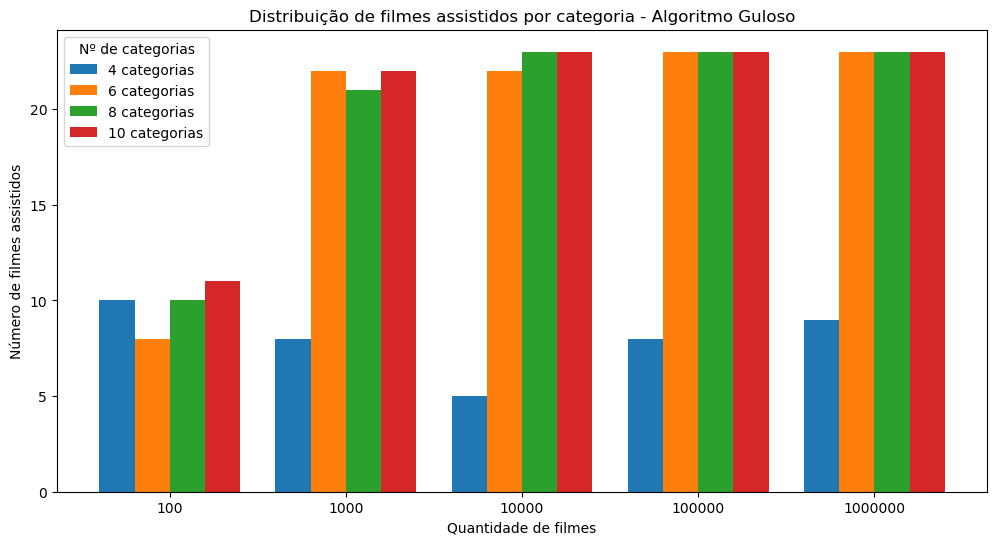

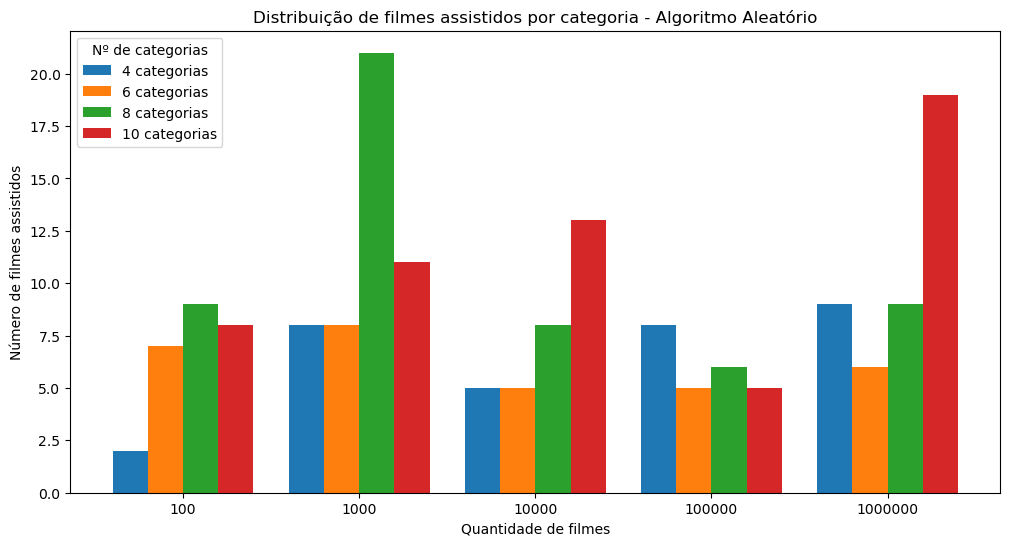

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_filmes_assistidos_por_categoria(title, filmes, categorias, films_watched):
    categorias_unicas = sorted(list(set(categorias)))
    num_categorias = len(categorias_unicas)
    filmes_unicos = sorted(list(set(filmes)))
    indices = np.arange(len(filmes_unicos))
    largura_barra = 0.8 / num_categorias

    plt.figure(figsize=(12, 6))

    # Cria um dicionário para armazenar os valores por categoria
    dados_por_categoria = {}
    for categoria in categorias_unicas:
        dados_por_categoria[categoria] = [0] * len(filmes_unicos)

    # Atribui os filmes assistidos a cada categoria
    for i in range(len(filmes)):
        filme_atual = filmes[i]
        categoria_atual = categorias[i]
        idx_filme = filmes_unicos.index(filme_atual)
        dados_por_categoria[categoria_atual][idx_filme] = films_watched[i]

    # Plota as barras agrupadas
    for i, (categoria, filmes_categoria) in enumerate(dados_por_categoria.items()):
        indices_categoria = indices + i * largura_barra
        plt.bar(indices_categoria, filmes_categoria, width=largura_barra, label=f"{categoria} categorias")

    plt.xlabel("Quantidade de filmes")
    plt.ylabel("Número de filmes assistidos")
    plt.title(title)
    plt.xticks(indices + largura_barra * (num_categorias - 1) / 2, filmes_unicos)
    plt.legend(title="Nº de categorias")
    plt.show()

plot_filmes_assistidos_por_categoria("Distribuição de filmes assistidos por categoria - Algoritmo Guloso", gulosa_params[0], gulosa_params[1], gulosa_params[4])
plot_filmes_assistidos_por_categoria("Distribuição de filmes assistidos por categoria - Algoritmo Aleatório", aleatoria_params[0], aleatoria_params[1], aleatoria_params[4])

# Gráfico 3D

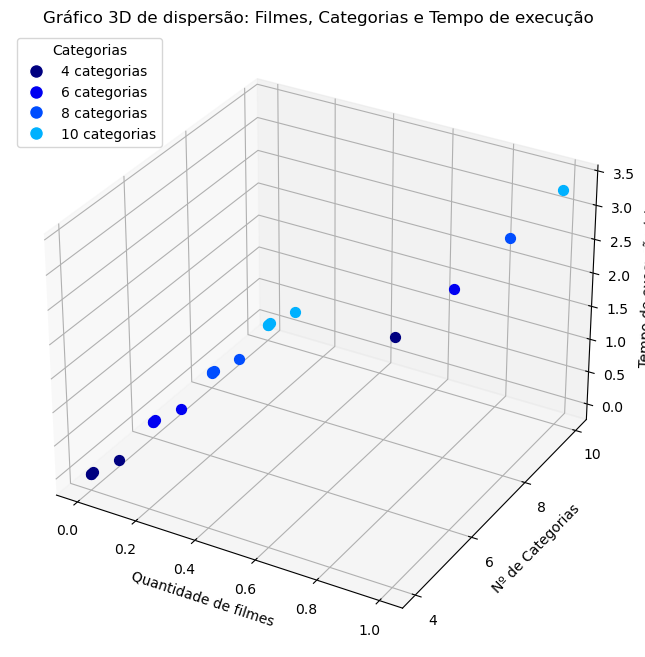

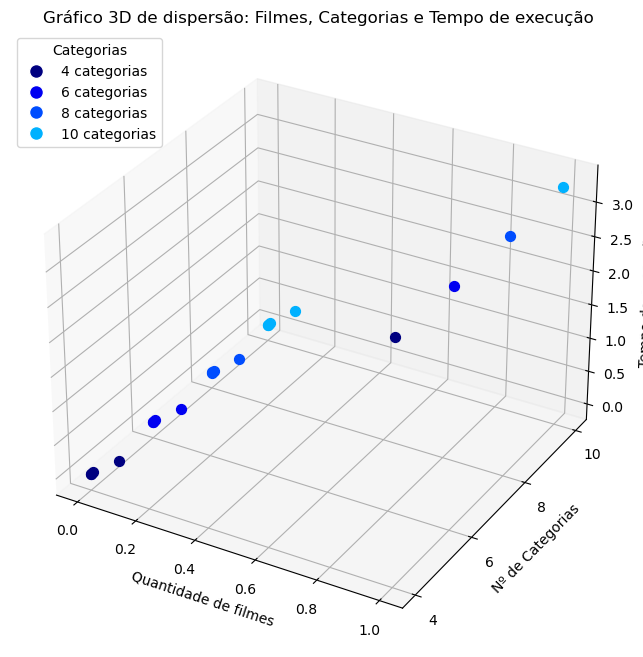

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(filmes, categorias, exec_time):
    # Obtém as categorias únicas
    categorias_unicas = sorted(list(set(categorias)))

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Cria um dicionário para armazenar as cores por categoria
    colors = {
        categoria: plt.cm.jet(float(i) / max(categorias_unicas))
        for i, categoria in enumerate(categorias_unicas)
    }

    # Ajuste na posição das categorias para criar camadas separadas
    offset = 10
    pos_categorias = {categoria: i * offset for i, categoria in enumerate(categorias_unicas)}

    for i in range(len(filmes)):
        ax.scatter(filmes[i], pos_categorias[categorias[i]], exec_time[i], c=[colors[categorias[i]]], marker='o', s=50)

    ax.set_xlabel("Quantidade de filmes")
    ax.set_ylabel("Nº de Categorias")
    ax.set_zlabel("Tempo de execução (s)")
    ax.set_title("Gráfico 3D de dispersão: Filmes, Categorias e Tempo de execução")
    ax.set_yticks(list(pos_categorias.values()))
    ax.set_yticklabels([f"{cat}" for cat in categorias_unicas])

    # Adiciona a legenda para as categorias
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=f"{categoria} categorias",
            markerfacecolor=colors[categoria], markersize=10)
        for categoria in categorias_unicas
    ]
    ax.legend(handles=legend_elements, title="Categorias", loc='upper left')

    # Ajusta o limite do eixo X para evitar o corte
    # ax.set_xlim(min(filmes) - 100, max(filmes) + 100)

    plt.show()

plot_3d_scatter(gulosa_params[0], gulosa_params[1], [t / 1000 for t in gulosa_params[2]])
plot_3d_scatter(aleatoria_params[0], aleatoria_params[1], [t / 1000 for t in aleatoria_params[2]])

# 7. Conclusões
----

A partir da análise das tabelas e dos gráficos gerados, podemos tirar algumas conclusões sobre o comportamento das heurísticas implementadas.


Ficou evidente que os tempos de execução para os algoritmos foram próximos, com algumas diferenças em especial....

O método aleatório foi mais rápido para inputs com poucos filmes e poucas categorias, mas o método guloso foi mais rápido para inputs com mais filmes e categorias. Isso se deve ao fato de que o método guloso é mais eficiente para inputs maiores. Sendo assim, fica mais claro em qual contexto cada algoritmo é mais eficiente.


Em resumo, o algoritmo guloso parece ser uma abordagem mais eficiente para selecionar filmes para uma maratona, uma vez que geralmente resulta em maior tempo de tela e mais filmes assistidos. No entanto, isso não se aplica para todos os tipos de inputs, além de que o heurística gulosa pode levar mais tempo para ser executada do que a aleatória, especialmente quando o número de filmes e categorias é maior.